## Load Libraries

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split 

from src.models.RF_model import RFModel
from src.models.CNN_model import CNNModel

## Load Data and Features

In [2]:
X = pd.read_csv(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'data_processed.csv'), header=None).to_numpy()
y = pd.read_csv(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'labels_processed.csv'), header=None).to_numpy()
features = pd.read_csv(os.path.join(r'C:\Programming\SickKidsTest\data\processed', 'features.csv'))

X_train, X_test, y_train, y_test, features_train, features_test = train_test_split(X, y, features.values, test_size=0.15, 
                                                                                   random_state=42, stratify=y)

## RF Model

   max_depth  n_estimators criterion max_features
0         40           200   entropy         sqrt


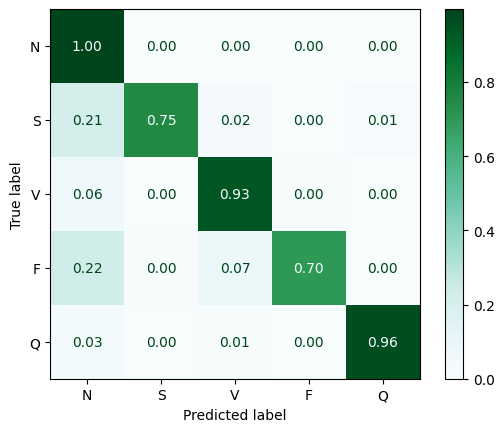

In [3]:
rfModel = RFModel(model_dir=r'C:\Programming\SickKidsTest\models')
rfModel.TuneHyperparameters(features_train, y_train.flatten())
print(pd.DataFrame(rfModel.params, index=[0]))
rfModel.fit(features_train, y_train.flatten())
rf_scores = rfModel.score(y_test, features_test, save_dir=r'C:\Programming\SickKidsTest\reports\figures',
                          title='RF_cm')
pd.DataFrame(rf_scores).transpose().to_csv(r'C:\Programming\SickKidsTest\reports\CSVs\rf_scores.csv')

## CNN Model

   dropout optimizer_name        lr  momentum  num_epochs  batch_size
0      0.0           Adam  0.001419  0.044958         112          64


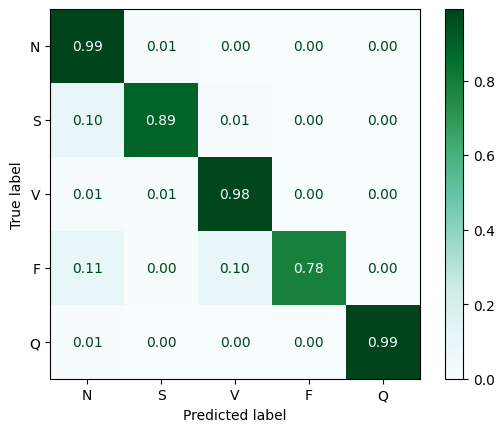

In [4]:
cnnModel = CNNModel(model_dir=r'C:\Programming\SickKidsTest\models')
cnnModel.TuneHyperparameters(X_train, y_train)
print(pd.DataFrame(cnnModel.params, index=[0]))
cnnModel.fit(X_train, y_train)
cnn_scores = cnnModel.score(y_test, X_test, save_dir=r'C:\Programming\SickKidsTest\reports\figures',
                          title='CNN_cm')
pd.DataFrame(cnn_scores).transpose().to_csv(r'C:\Programming\SickKidsTest\reports\CSVs\cnn_scores.csv')